# 온도인자 11개와 두께 Correlationshipe 분석후 feature selection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn           as sb
import scipy.stats       as sp
# import lightgbm as lgb # 쓰는건가?

In [83]:
path_temp = './factor table/total_temp_factor_table.csv'
path_thick = './factor table/total_thick_factor_table.csv'

temp = pd.read_csv(path_temp)
thickness_ = pd.read_csv(path_thick)
thickness = thickness_.iloc[:,2:]

In [84]:
temp

,Unnamed: 0,case,input_max,input_min,input_mean,input_rms,input_var,input_skew,input_kurto,input_diff,pre_max,pre_min,pre_mean,pre_rms,pre_var,pre_skew,pre_kurto,pre_diff
0,0,t1_dp1,114.2,80.0,95.775,96.562493,151.464375,-0.158555,-1.455239,12.542857,114.108728,79.999994,97.261846,97.685423,82.575197,-0.628601,-0.481771,29341.838770
1,1,t1_dp2,113.4,80.0,91.075,91.857689,143.179375,0.782219,-0.960372,14.885714,113.337885,79.999994,90.353738,90.869391,93.448270,0.642425,-0.865616,34258.142699
2,2,t1_dp3,118.6,80.0,98.825,99.702533,174.214375,-0.011566,-1.144948,8.485714,118.568414,79.999994,99.382548,99.955100,114.131161,-0.131656,-0.465603,20604.020121
3,3,t1_dp4,108.2,80.0,92.875,93.441720,105.589375,0.365224,-1.293235,13.342857,106.891962,79.999994,92.985020,93.257205,50.692386,0.152505,-0.423377,28874.206087
4,4,t1_dp5,119.0,80.0,93.575,94.481083,170.394375,0.758236,-0.722031,15.457143,116.691675,79.999994,93.966796,94.450014,91.046402,0.464568,-0.417445,34031.899658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,t5_dp96,118.2,80.0,108.000,108.961498,208.608000,-1.296107,-0.070078,14.250000,116.864403,79.999992,108.998967,109.788209,172.676029,-1.503252,0.544705,21290.539315
496,496,t5_dp97,118.6,80.0,99.760,101.068690,262.822400,-0.283415,-1.744761,26.450000,117.067162,79.999992,95.358977,95.932977,109.801559,0.308301,-0.579416,45188.727502
497,497,t5_dp98,119.0,80.0,104.880,105.715846,176.025600,-1.048004,-0.257269,14.950000,117.451286,79.999992,104.888152,105.471435,122.699070,-1.529282,0.752370,22409.979642
498,498,t5_dp99,119.4,80.0,99.920,101.438770,305.817600,-0.012402,-1.749469,29.250000,117.835381,79.999992,101.235962,101.961897,147.508504,-0.654274,-1.039978,46782.730057


In [85]:
thickness

,tot_GMGm,tot_slope,tot_peaknum,tot_PMGm,side_GMGm,side_slope,side_peaknum,side_PMGm
0,2.638650,2148.358167,1.0,1.040314,1.040314,583.630269,1.0,1.040314
1,2.597181,2212.105485,1.0,1.048973,1.499571,1133.789207,1.0,1.048973
2,2.548518,2104.217950,1.0,0.362526,0.673468,370.914170,1.0,0.362526
3,2.536229,2124.922103,2.0,1.179890,0.903902,517.718705,1.0,0.403902
4,2.528632,2281.857997,2.0,0.955431,0.949288,792.140243,1.0,0.604483
...,...,...,...,...,...,...,...,...
495,2.614353,2079.039007,1.0,0.585347,0.842954,399.940865,0.0,0.000000
496,2.513997,1963.921833,1.0,0.859696,0.878166,340.570809,1.0,0.859696
497,2.517421,2030.549830,1.0,0.407448,0.424337,209.243327,0.0,0.000000
498,2.687295,2319.019759,1.0,0.978639,0.978639,487.555014,1.0,0.978639


In [95]:
feature = temp.columns
drop_ = [3, 5, 10,11,13] # input min, input_rms, pre_max, pre_min , pre_rms
feature_ = feature.drop(df.columns[drop_])
feature = feature_[2:]
feature.shape

# feature = df.columns[4:]``

(11,)

In [96]:
feature

Index(['input_max', 'input_mean', 'input_var', 'input_skew', 'input_kurto',
       'input_diff', 'pre_mean', 'pre_var', 'pre_skew', 'pre_kurto',
       'pre_diff'],
      dtype='object')

In [97]:
X_Y = pd.concat([temp[feature],thickness],axis = 1)
X_Y

,input_max,input_mean,input_var,input_skew,input_kurto,input_diff,pre_mean,pre_var,pre_skew,pre_kurto,pre_diff,tot_GMGm,tot_slope,tot_peaknum,tot_PMGm,side_GMGm,side_slope,side_peaknum,side_PMGm
0,114.2,95.775,151.464375,-0.158555,-1.455239,12.542857,97.261846,82.575197,-0.628601,-0.481771,29341.838770,2.638650,2148.358167,1.0,1.040314,1.040314,583.630269,1.0,1.040314
1,113.4,91.075,143.179375,0.782219,-0.960372,14.885714,90.353738,93.448270,0.642425,-0.865616,34258.142699,2.597181,2212.105485,1.0,1.048973,1.499571,1133.789207,1.0,1.048973
2,118.6,98.825,174.214375,-0.011566,-1.144948,8.485714,99.382548,114.131161,-0.131656,-0.465603,20604.020121,2.548518,2104.217950,1.0,0.362526,0.673468,370.914170,1.0,0.362526
3,108.2,92.875,105.589375,0.365224,-1.293235,13.342857,92.985020,50.692386,0.152505,-0.423377,28874.206087,2.536229,2124.922103,2.0,1.179890,0.903902,517.718705,1.0,0.403902
4,119.0,93.575,170.394375,0.758236,-0.722031,15.457143,93.966796,91.046402,0.464568,-0.417445,34031.899658,2.528632,2281.857997,2.0,0.955431,0.949288,792.140243,1.0,0.604483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,118.2,108.000,208.608000,-1.296107,-0.070078,14.250000,108.998967,172.676029,-1.503252,0.544705,21290.539315,2.614353,2079.039007,1.0,0.585347,0.842954,399.940865,0.0,0.000000
496,118.6,99.760,262.822400,-0.283415,-1.744761,26.450000,95.358977,109.801559,0.308301,-0.579416,45188.727502,2.513997,1963.921833,1.0,0.859696,0.878166,340.570809,1.0,0.859696
497,119.0,104.880,176.025600,-1.048004,-0.257269,14.950000,104.888152,122.699070,-1.529282,0.752370,22409.979642,2.517421,2030.549830,1.0,0.407448,0.424337,209.243327,0.0,0.000000
498,119.4,99.920,305.817600,-0.012402,-1.749469,29.250000,101.235962,147.508504,-0.654274,-1.039978,46782.730057,2.687295,2319.019759,1.0,0.978639,0.978639,487.555014,1.0,0.978639


In [98]:
num_of_feature = 11

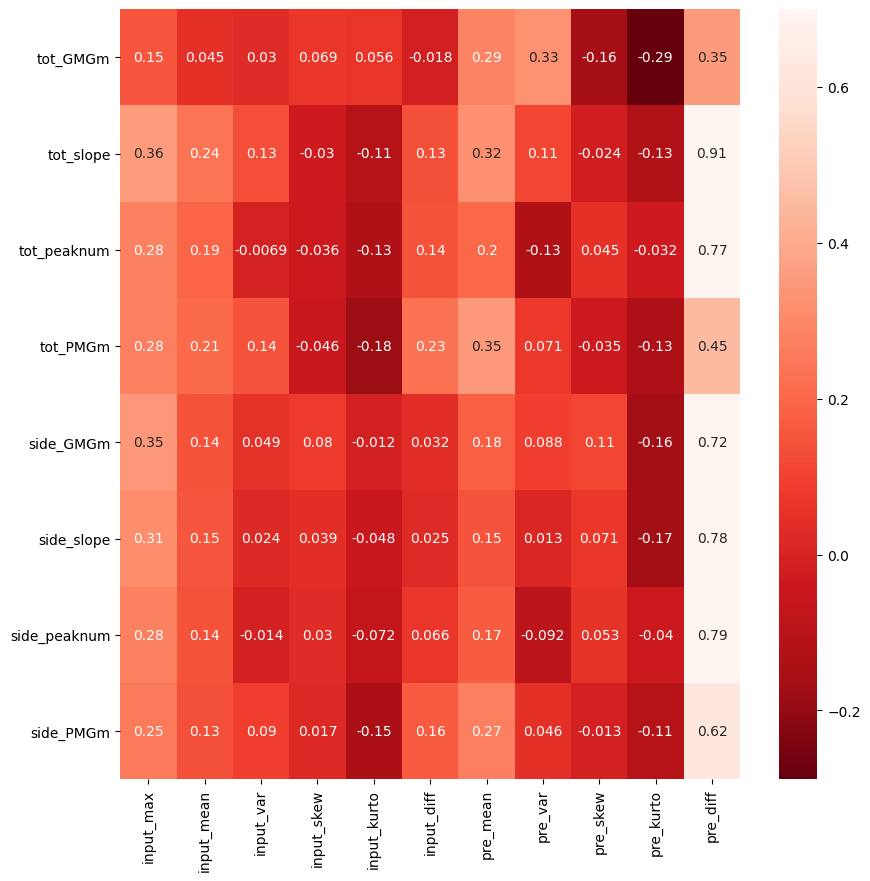

In [100]:
train_co = X_Y
# num_of_feature = 10
# pre diff 제외


train_co.corr()
pc =  train_co.corr().iloc[num_of_feature:,:num_of_feature]
plt.figure(figsize = (10,10))

sb.heatmap(pc, cmap="Reds_r",vmax=0.7,annot = True)
plt.savefig('temp500.jpg')
plt.show()

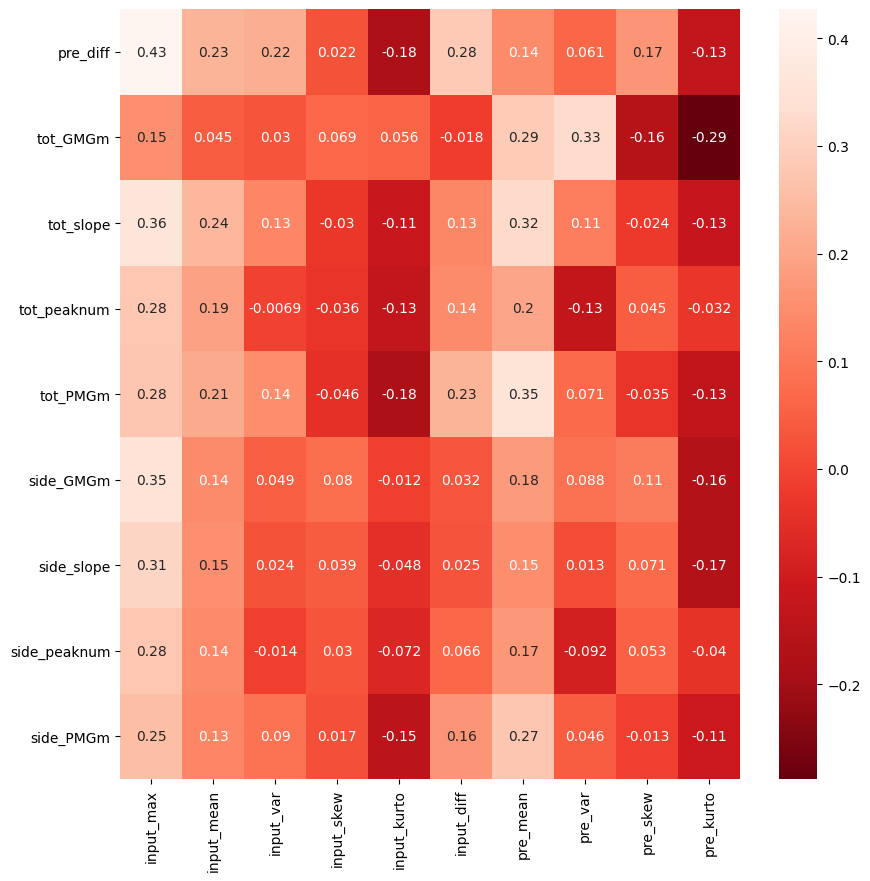

In [77]:
train_co = X_Y


train_co.corr()
pc =  train_co.corr().iloc[num_of_feature:,:num_of_feature]
plt.figure(figsize = (10,10))

sb.heatmap(pc, cmap="Reds_r",annot = True)
plt.savefig('temp500.jpg')
plt.show()

## 5개 구해서 평균

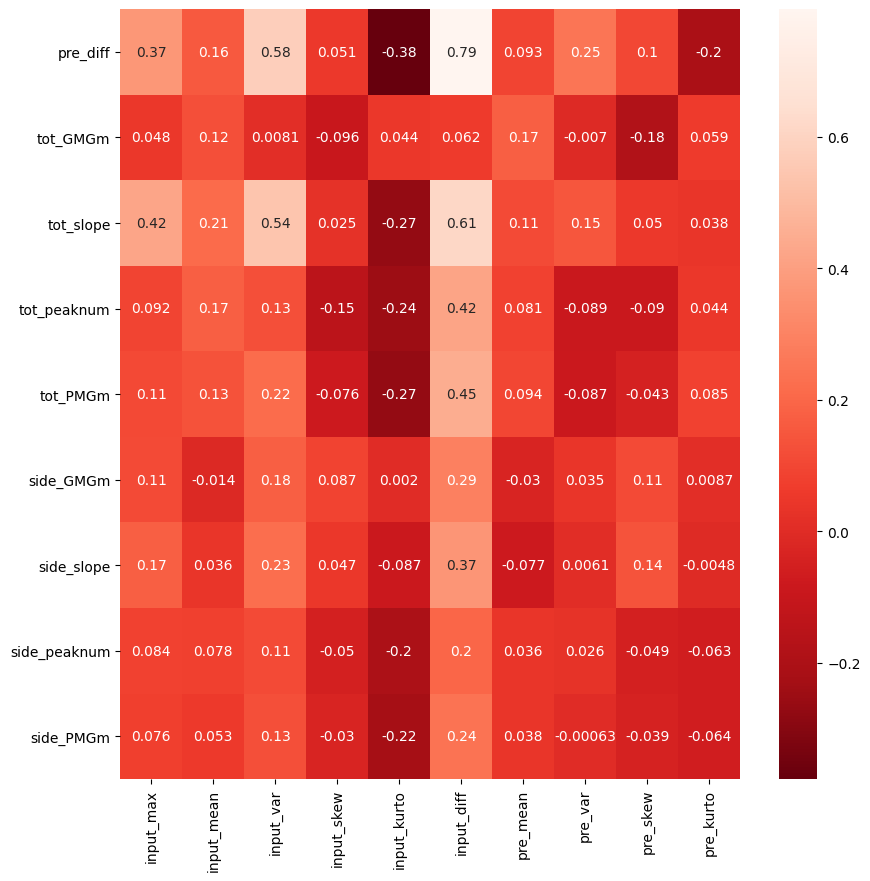

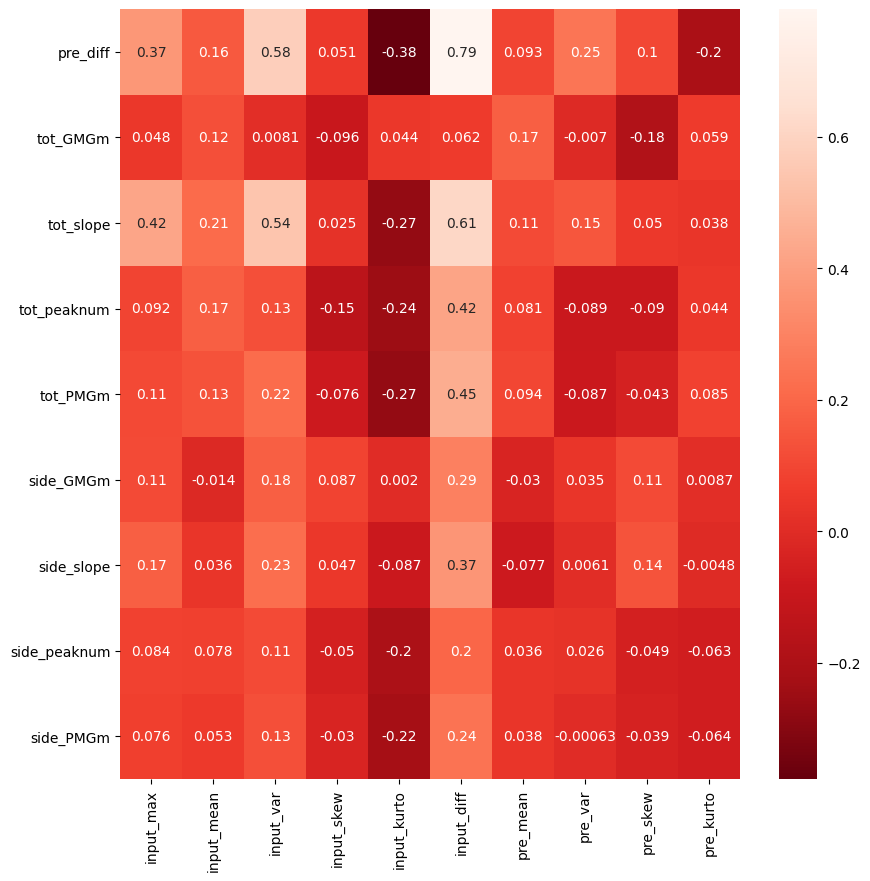

In [79]:
path = './factor table/test1_temp_factor_table.csv'

s = 0
for i in range(5):
    path = './factor table/test{}_temp_factor_table.csv'.format(i+1)
    temp = pd.read_csv(path)
    feature = temp.columns
    drop_ = [3, 5, 10,11,13] # input min, input_rms, pre_max, pre_min , pre_rms
    feature_ = feature.drop(df.columns[drop_])
    feature = feature_[2:]

    X_Y = pd.concat([temp[feature],thickness],axis = 1) # 구분할 temp+thickness 열기준 병합
    train_co = X_Y
    pc =  train_co.corr().iloc[num_of_feature:,:num_of_feature] #X-Y 관계 보기 위해 11 기준
    s += pc
plt.figure(figsize = (10,10))

sb.heatmap(s/5, cmap="Reds_r",annot = True)
plt.savefig('temp-thickavg.jpg')
plt.show()


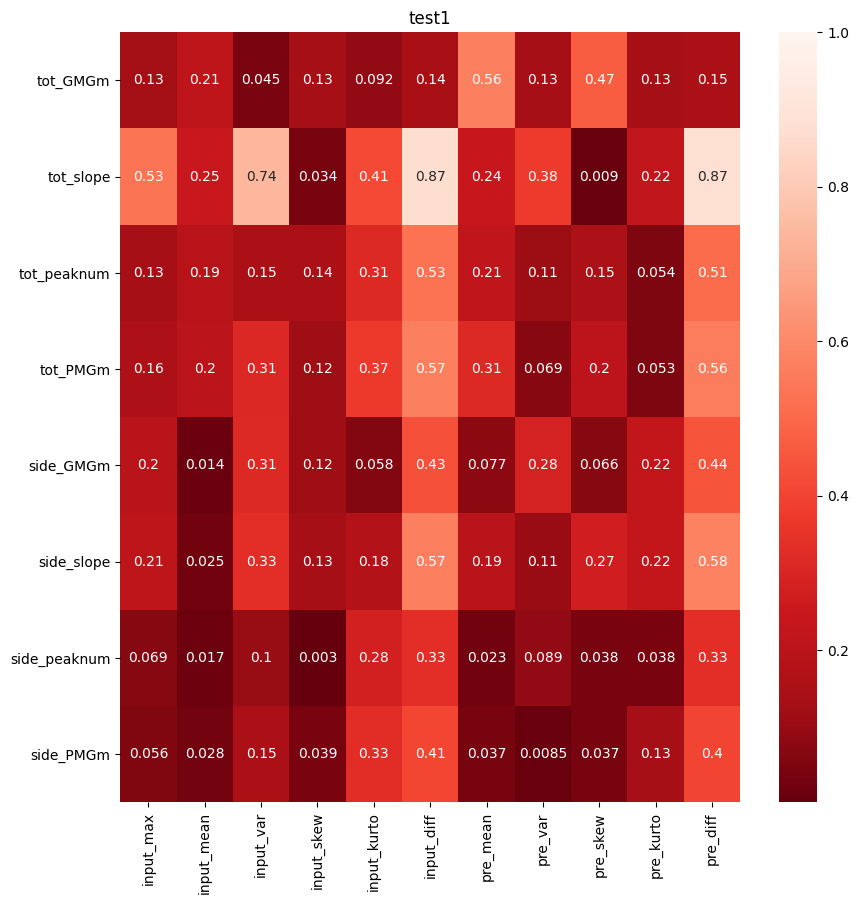

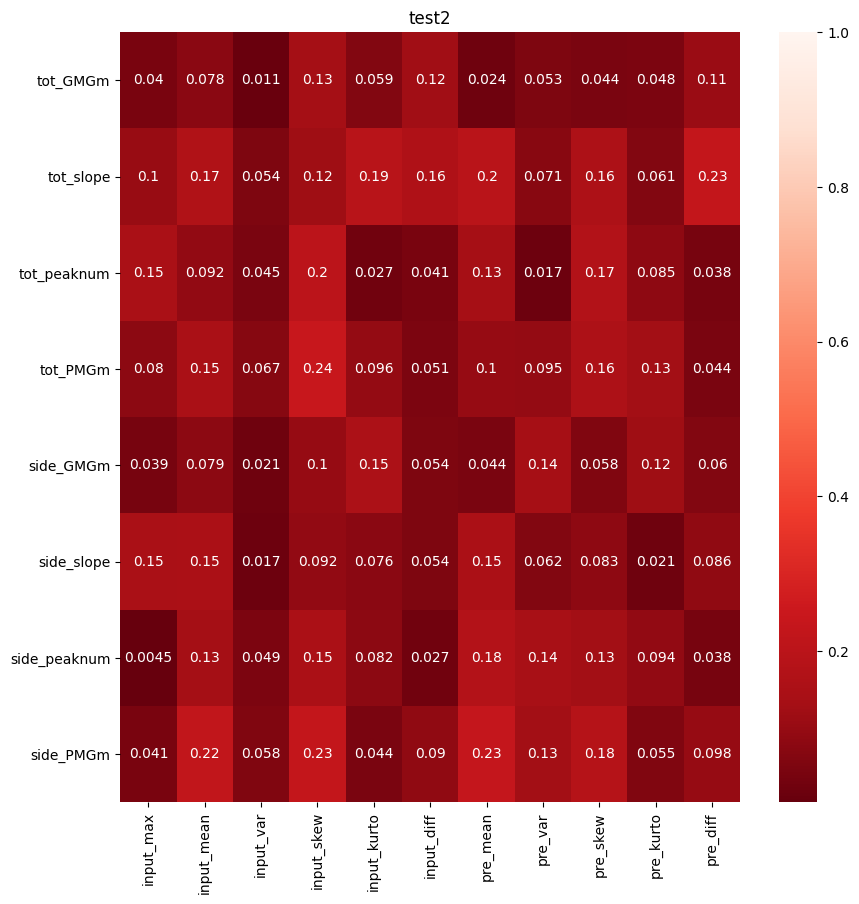

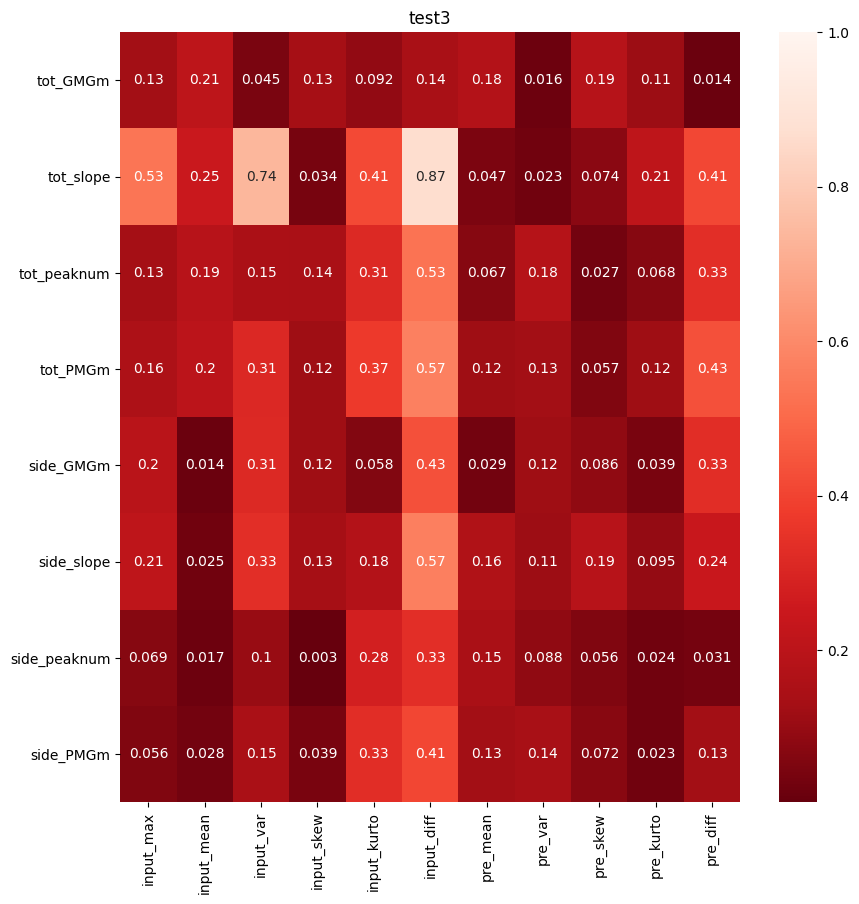

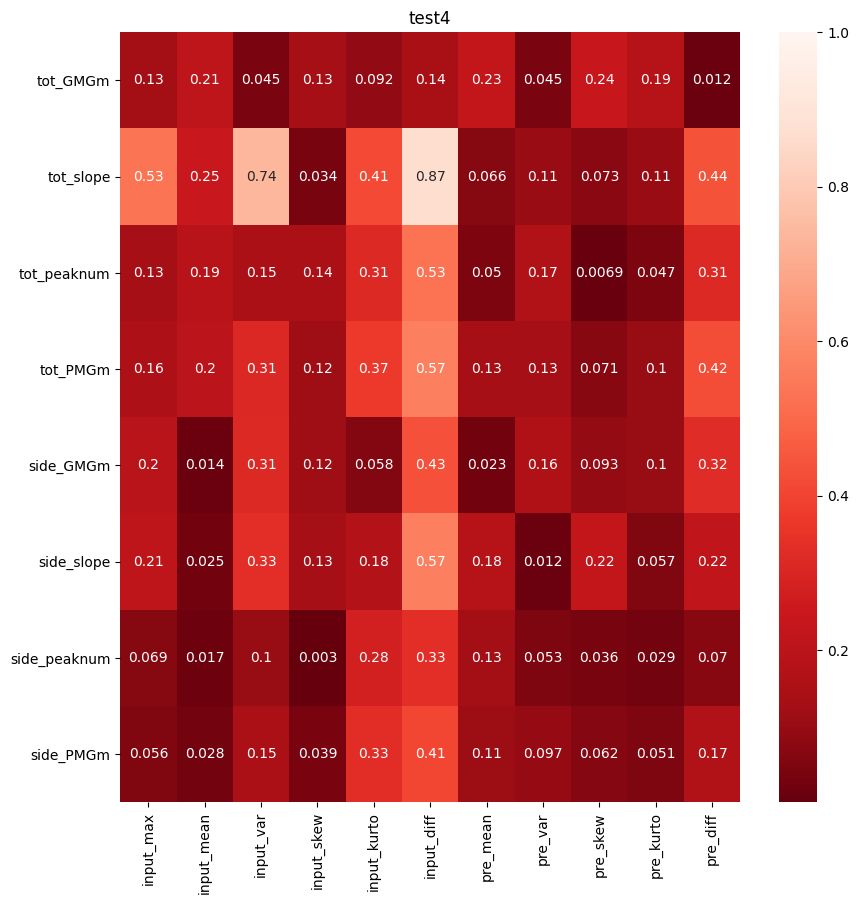

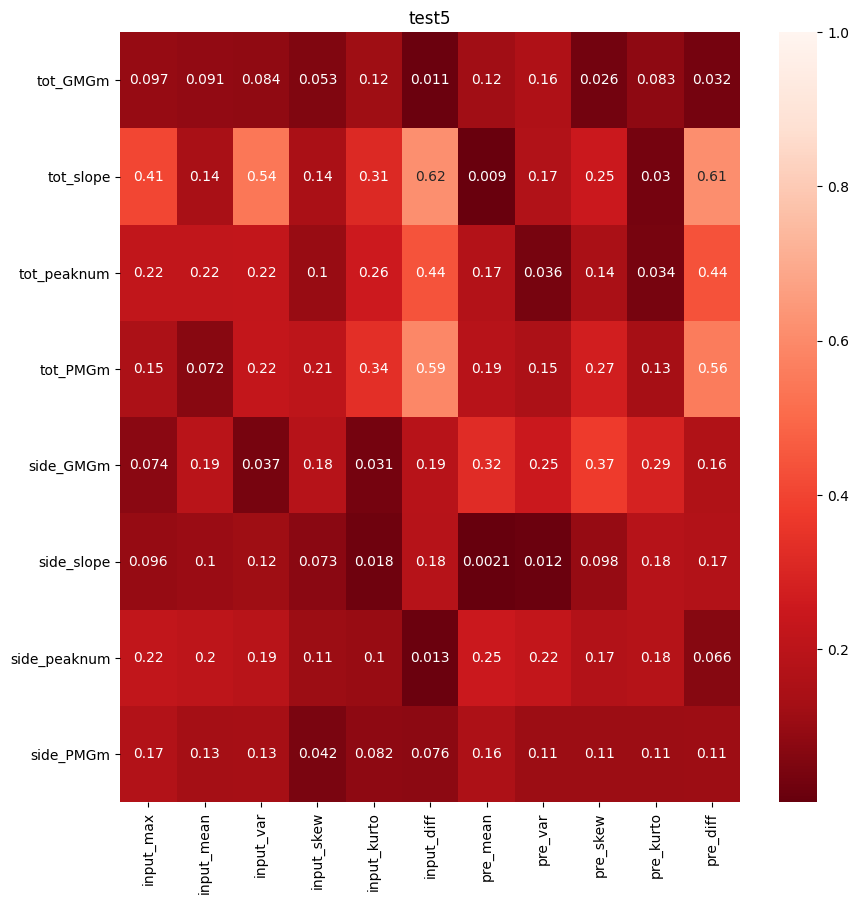

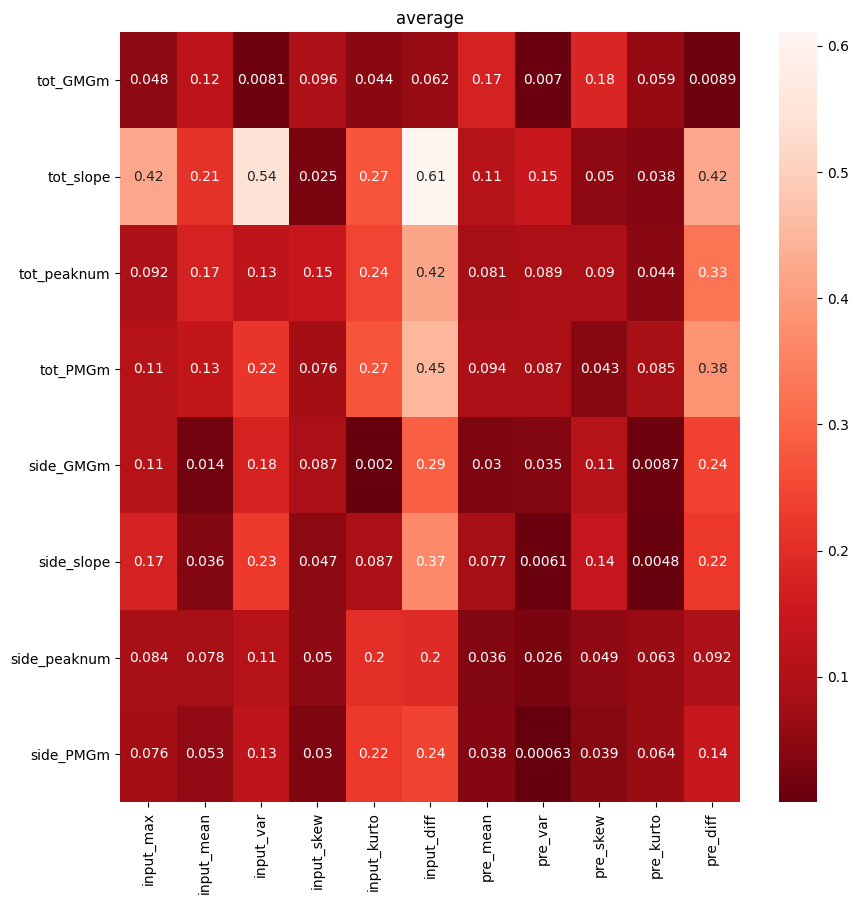

In [165]:
path = './factor table/test1_temp_factor_table.csv'

s = 0
for i in range(5):
    path = './factor table/test{}_temp_factor_table.csv'.format(i+1)
    temp = pd.read_csv(path)
    feature = temp.columns
    drop_ = [3, 5, 10,11,13] # input min, input_rms, pre_max, pre_min , pre_rms
    feature_ = feature.drop(df.columns[drop_])
    feature = feature_[2:]

    X_Y = pd.concat([temp[feature],thickness],axis = 1) # 구분할 temp+thickness 열기준 병합
    train_co = X_Y
    pc =  train_co.corr().iloc[num_of_feature:,:num_of_feature] #X-Y 관계 보기 위해 11 기준
    plt.figure(figsize = (10,10))
    sb.heatmap(abs(pc), vmax = 1.0 ,cmap="Reds_r",annot = True)
    plt.title('test{}'.format(i+1))
    plt.savefig('./fig/test{}_temp-Y.jpg'.format(i+1))
    plt.show()
    s += pc
plt.figure(figsize = (10,10))

sb.heatmap(abs(s/5),cmap="Reds_r",annot = True)
plt.title('average')
plt.savefig('./fig/avg_temp-Y.jpg')
plt.show()


## 순위 뽑기 (11개중 상위 n 개 특징값 추출)

In [159]:
avg = abs(s/5) #절대값으로 처리
avg.shape

(8, 11)

In [160]:
rank = pd.DataFrame(columns = feature,index=range(0,1)) # 피쳐 이름 그대로 가져오면서 1행짜리 데이터 만들기
for i,r in enumerate(feature):
    rank.iloc[0,i] = np.mean(avg[r])
rank

,input_max,input_mean,input_var,input_skew,input_kurto,input_diff,pre_mean,pre_var,pre_skew,pre_kurto,pre_diff
0,0.139194,0.102858,0.190918,0.069805,0.168347,0.328691,0.08033,0.050095,0.08796,0.045856,0.229613


In [161]:
rank_tp = np.transpose(rank)
rank_ds = rank_tp.sort_values(by = 0,ascending = False)

In [162]:
rank_ds

,0
input_diff,0.328691
pre_diff,0.229613
input_var,0.190918
input_kurto,0.168347
input_max,0.139194
input_mean,0.102858
pre_skew,0.08796
pre_mean,0.08033
input_skew,0.069805
pre_var,0.050095


In [152]:
rank_as.describe()

,0
count,11.000000
unique,11.000000
top,0.328691
freq,1.000000


# 절대값 0.9 넘는애들만 살리고 나머지 0

In [58]:
X_Y.shape[1]

19

In [57]:
threshold = 0.3
feature_num = X_Y.shape[1]
feature_temp = pc.copy() # 피쳐 이름 살리기 위해 원본 결과 복사
for i in range(feature_num):
    for j in range(feature_num):
        temp_pc = pc.iloc[i,j]
        if (abs(temp_pc) < threshold):
            feature_temp.iloc[i,j] = 0
    
feature_temp.shape # (특징개수,특징개수)

plt.figure(figsize = (15,15))
sb.heatmap(feature_temp,annot = True)
plt.show()

IndexError: single positional indexer is out-of-bounds

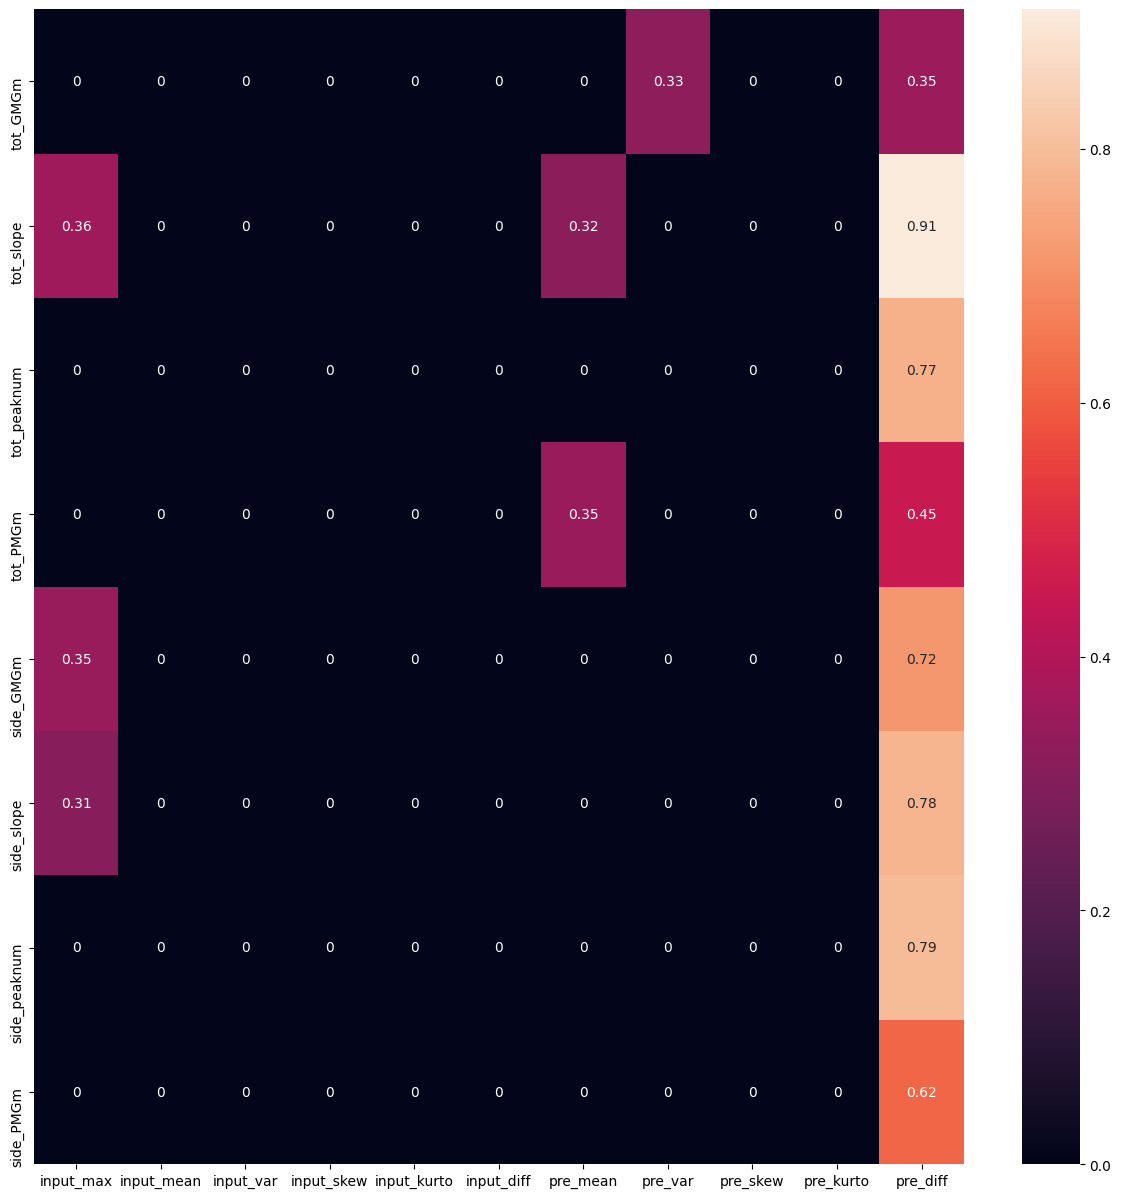

In [56]:
plt.figure(figsize = (15,15))
sb.heatmap(feature_temp,annot = True)
plt.show()

# test 1~5 별개 5개 분석

In [110]:
threshold = 0.3 # 절대값 기준 threshold 이상만 표기

drop_ = [5, 10,11,13] # input_rms, pre_max, pre_min , pre_rms

In [111]:
df.columns

Index(['Unnamed: 0', 'case', 'input_max', 'input_min', 'input_mean',
       'input_rms', 'input_var', 'input_skew', 'input_kurto', 'input_diff',
       'pre_max', 'pre_min', 'pre_mean', 'pre_rms', 'pre_var', 'pre_skew',
       'pre_kurto', 'pre_diff'],
      dtype='object')

In [112]:
feature

Index(['input_mean', 'input_var', 'input_skew', 'input_kurto', 'input_diff',
       'pre_mean', 'pre_var', 'pre_skew', 'pre_kurto', 'pre_diff'],
      dtype='object')

<Figure size 1500x1500 with 0 Axes>

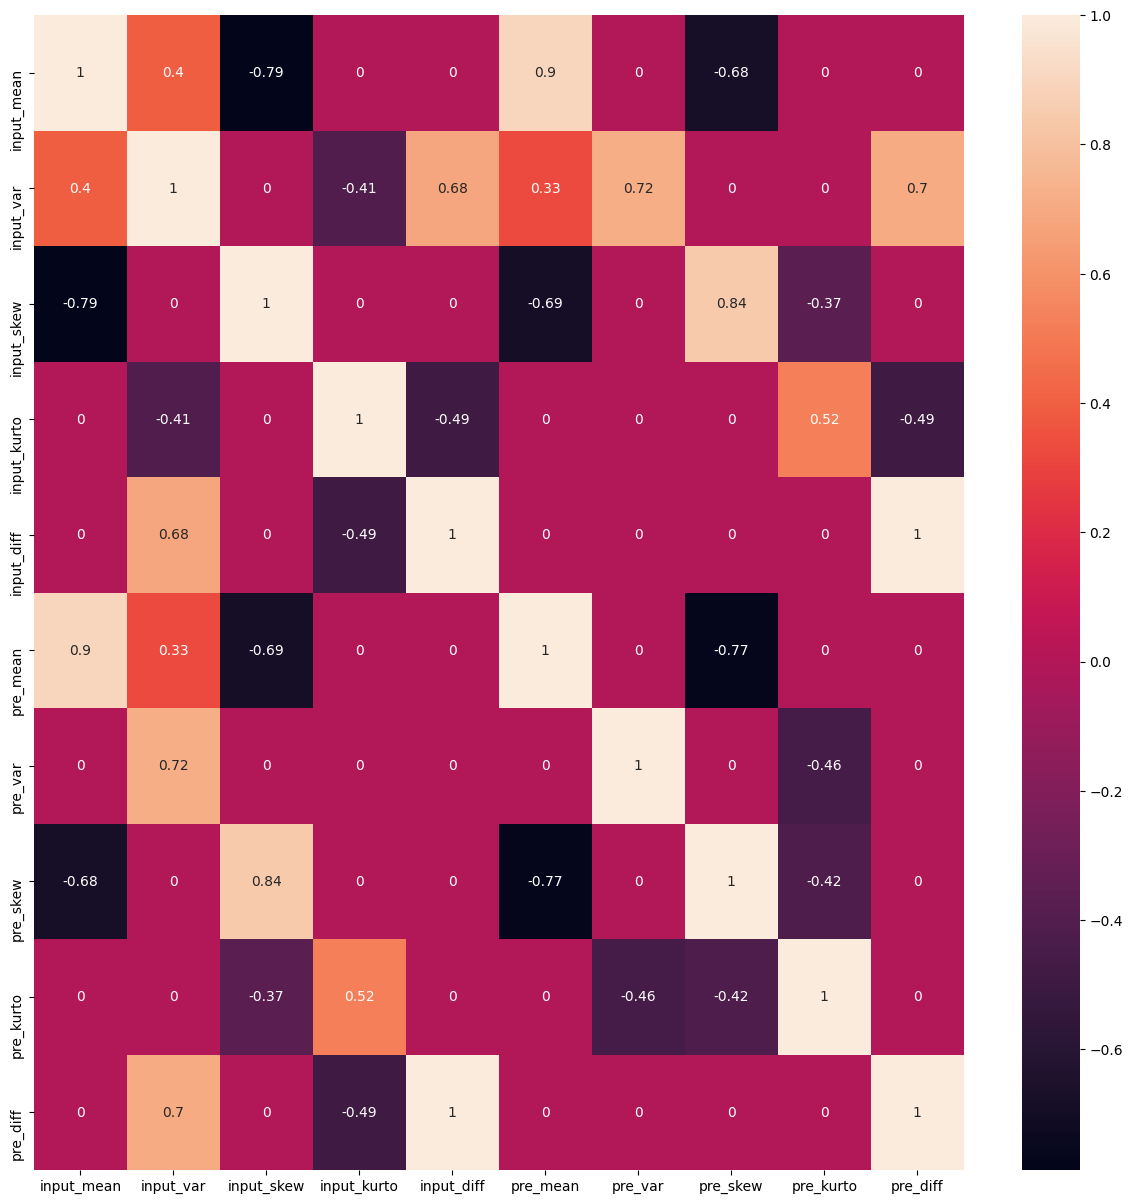

In [113]:
# test 1
path = './factor table/test1_temp_factor_table.csv'

df = pd.read_csv(path)

feature = df.columns

feature_ = feature.drop(df.columns[drop_])
feature = feature_[4:]

train_co = df[feature]

train_co.corr()
pc =  train_co.corr()
plt.figure(figsize = (15,15))
# sb.heatmap(pc,annot = True)
# plt.show()

# threshold = 0.4
feature_num = feature.shape[0]
feature_temp = pc.copy() # 피쳐 이름 살리기 위해 원본 결과 복사
for i in range(feature_num):
    for j in range(feature_num):
        temp_pc = pc.iloc[i,j]
        if (abs(temp_pc) < threshold):
            feature_temp.iloc[i,j] = 0
    
feature_temp.shape # (특징개수,특징개수)

plt.figure(figsize = (15,15))
sb.heatmap(feature_temp,annot = True)
plt.show()


<Figure size 1500x1500 with 0 Axes>

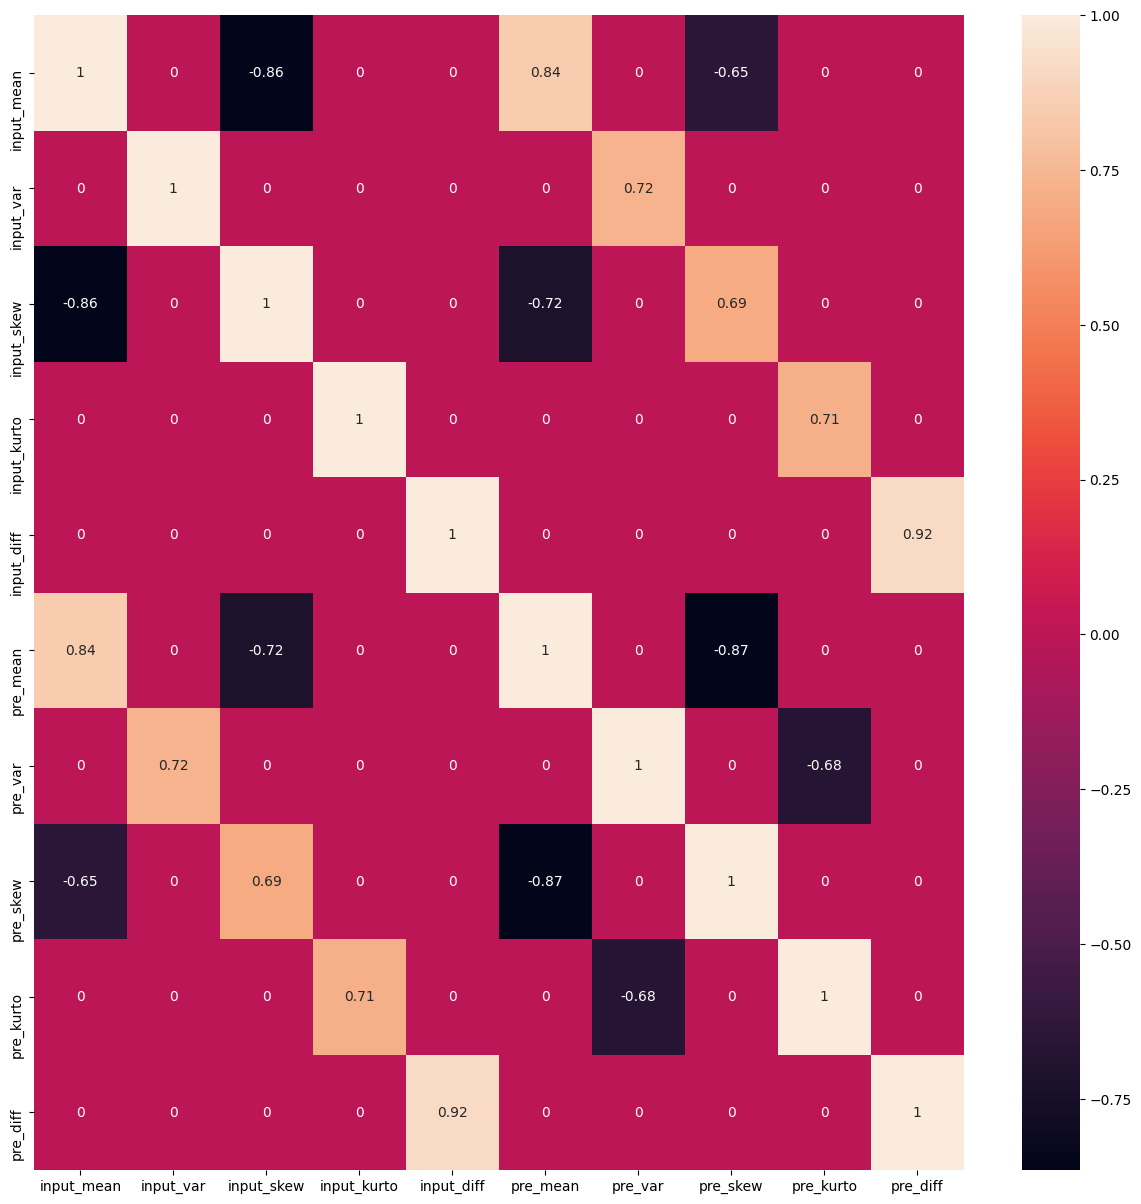

In [85]:
# test 2
path = './factor table/test2_temp_factor_table.csv'

df = pd.read_csv(path)

feature = df.columns
# drop_ = [10,11] # pre_max, pre_min
feature_ = feature.drop(df.columns[drop_])
feature = feature_[4:]

train_co = df[feature]

train_co.corr()
pc =  train_co.corr()
plt.figure(figsize = (15,15))
# sb.heatmap(pc,annot = True)
# plt.show()

# threshold = 0.4

feature_num = feature.shape[0]
feature_temp = pc.copy() # 피쳐 이름 살리기 위해 원본 결과 복사
for i in range(feature_num):
    for j in range(feature_num):
        temp_pc = pc.iloc[i,j]
        if (abs(temp_pc) < threshold):
            feature_temp.iloc[i,j] = 0
    
feature_temp.shape # (특징개수,특징개수)

plt.figure(figsize = (15,15))
sb.heatmap(feature_temp,annot = True)
plt.show()


<Figure size 1500x1500 with 0 Axes>

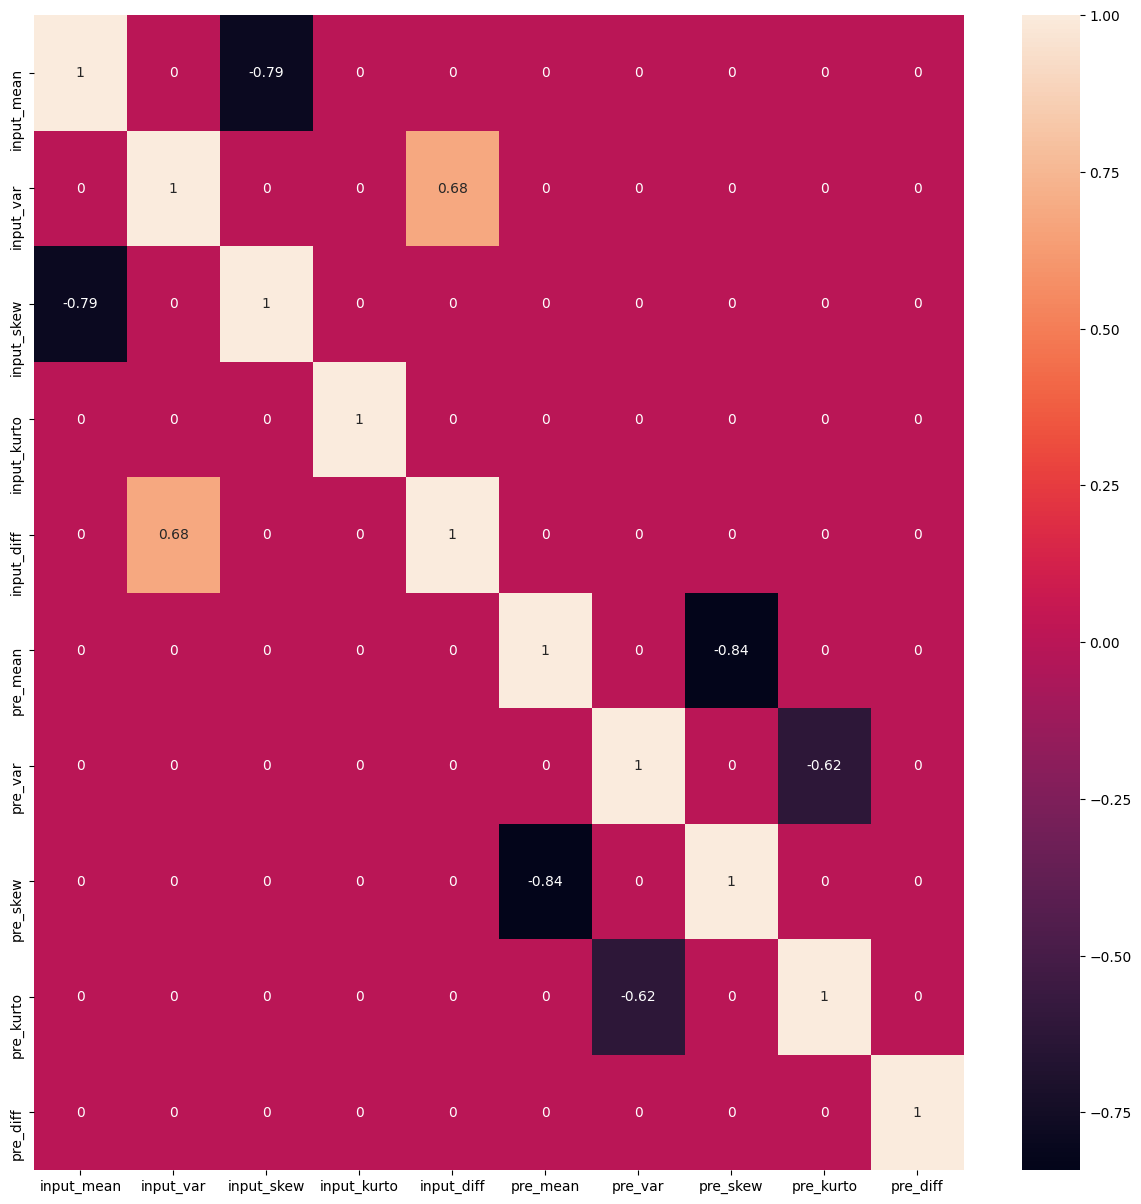

In [86]:
# test 3
path = './factor table/test3_temp_factor_table.csv'

df = pd.read_csv(path)

feature = df.columns
# drop_ = [10,11] # pre_max, pre_min
feature_ = feature.drop(df.columns[drop_])
feature = feature_[4:]
train_co = df[feature]

train_co.corr()
pc =  train_co.corr()
plt.figure(figsize = (15,15))
# sb.heatmap(pc,annot = True)
# plt.show()

# threshold = 0.4
feature_num = feature.shape[0]
feature_temp = pc.copy() # 피쳐 이름 살리기 위해 원본 결과 복사
for i in range(feature_num):
    for j in range(feature_num):
        temp_pc = pc.iloc[i,j]
        if (abs(temp_pc) < threshold):
            feature_temp.iloc[i,j] = 0
    
feature_temp.shape # (특징개수,특징개수)

plt.figure(figsize = (15,15))
sb.heatmap(feature_temp,annot = True)
plt.show()


<Figure size 1500x1500 with 0 Axes>

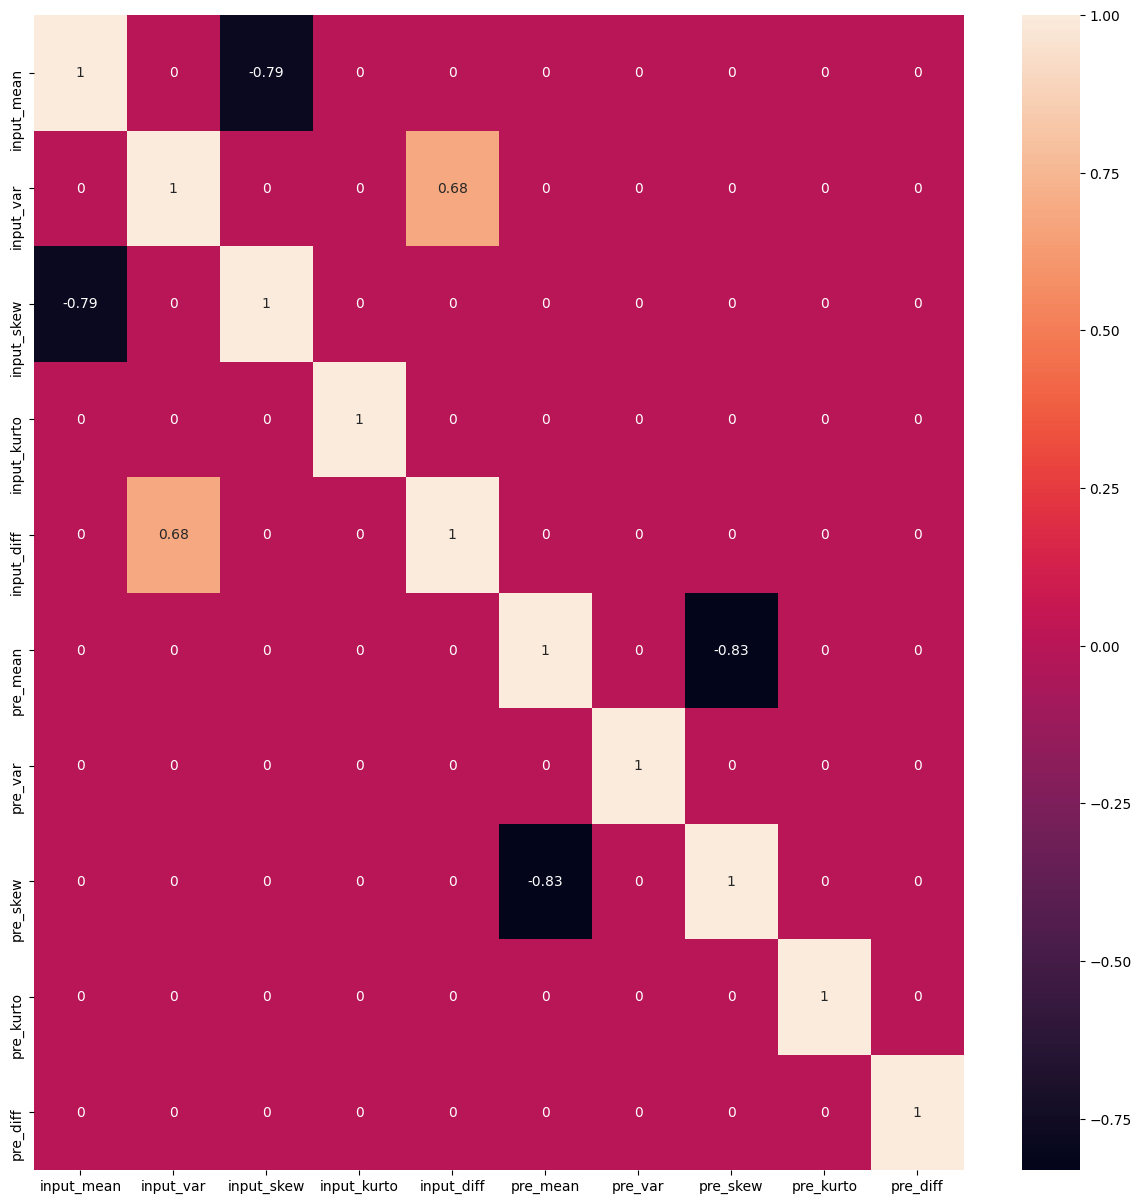

In [87]:
# test 4
path = './factor table/test4_temp_factor_table.csv'

df = pd.read_csv(path)

feature = df.columns
# drop_ = [10,11] # pre_max, pre_min
feature_ = feature.drop(df.columns[drop_])
feature = feature_[4:]

train_co = df[feature]

train_co.corr()
pc =  train_co.corr()
plt.figure(figsize = (15,15))
# sb.heatmap(pc,annot = True)
# plt.show()

# threshold = 0.4
feature_num = feature.shape[0]
feature_temp = pc.copy() # 피쳐 이름 살리기 위해 원본 결과 복사
for i in range(feature_num):
    for j in range(feature_num):
        temp_pc = pc.iloc[i,j]
        if (abs(temp_pc) < threshold):
            feature_temp.iloc[i,j] = 0
    
feature_temp.shape # (특징개수,특징개수)

plt.figure(figsize = (15,15))
sb.heatmap(feature_temp,annot = True)
plt.show()


<Figure size 1500x1500 with 0 Axes>

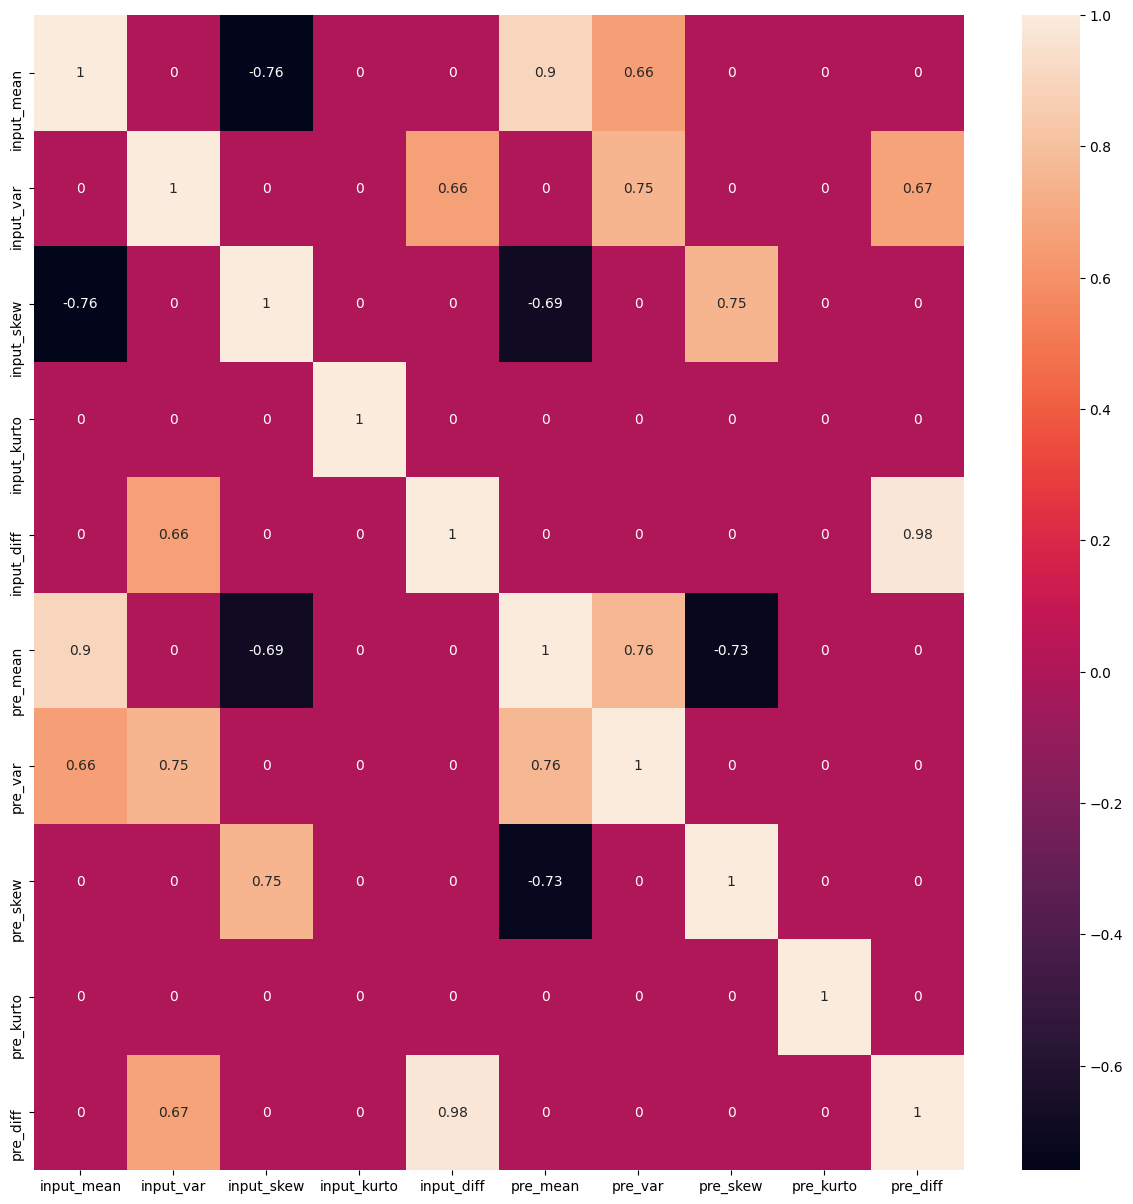

In [88]:
# test 5
path = './factor table/test5_temp_factor_table.csv'

df = pd.read_csv(path)

feature = df.columns
# drop_ = [10,11] # pre_max, pre_min
feature_ = feature.drop(df.columns[drop_])
feature = feature_[4:]

train_co = df[feature]

train_co.corr()
pc =  train_co.corr()
plt.figure(figsize = (15,15))
# sb.heatmap(pc,annot = True)
# plt.show()

# threshold = 0.4
feature_num = feature.shape[0]
feature_temp = pc.copy() # 피쳐 이름 살리기 위해 원본 결과 복사
for i in range(feature_num):
    for j in range(feature_num):
        temp_pc = pc.iloc[i,j]
        if (abs(temp_pc) < threshold):
            feature_temp.iloc[i,j] = 0
    
feature_temp.shape # (특징개수,특징개수)

plt.figure(figsize = (15,15))
sb.heatmap(feature_temp,annot = True)
plt.show()
